<a href="https://colab.research.google.com/github/Rtniewi/kcwiertniewicz-IDS/blob/main/AI/HW5/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Katrina Cwiertniewicz
### CSC362
### Submission Date: 3/28/24
### Purpose: The purpose of this assignment is to determine the optimal design of an I-beam. This is determined by minimizing Cross Section Area(f1) and Static Deflection (f2) and then comparing x values to determine which were minimized.


In [ ]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [ ]:
# Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




###Cross Sections Area (f1) - Minimization
#### Weighted Vector: F = 1(f1) + 0(f2)


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -63.70031 
Solution = 
           x1       x2       x3       x4
[1,] 20.70752 16.37534 1.059848 1.363113

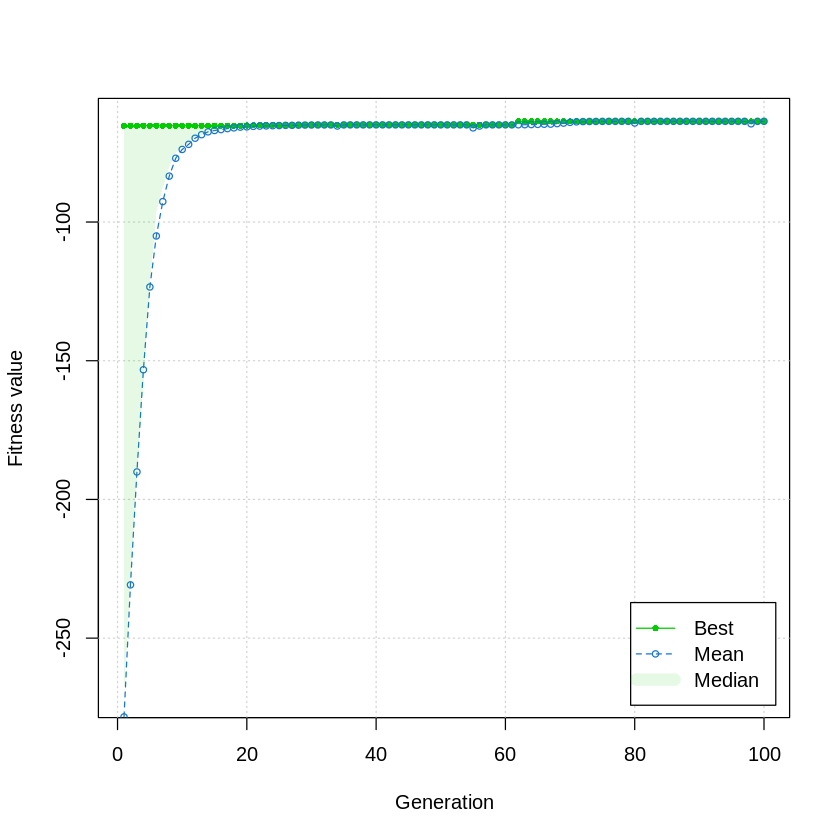

In [ ]:
# Cross Section Area (f1)

func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4 + x3 * (x1 - 2*x4)
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness = function(x) -func1(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)



*   x1 = 20.71
*   x2 = 16.38
*   x3 = 1.06
*   x4 = 1.36

#### All x values are closer to the lower bound values of the geometric side constraints in comparison to the upper bound values. x3 being the closest with 1.06 compared with a .90 lower bound minimum. x1 being the biggest difference with 20.71 compared with a 10 lower bound minimum.

###Static Deflection (f2)- Minimization
#### Weighted Vector F = 0(f1) + 1(f2)


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -30533.47 
Solution = 
          x1       x2       x3       x4
[1,] 14.4803 18.44257 3.709033 1.671784

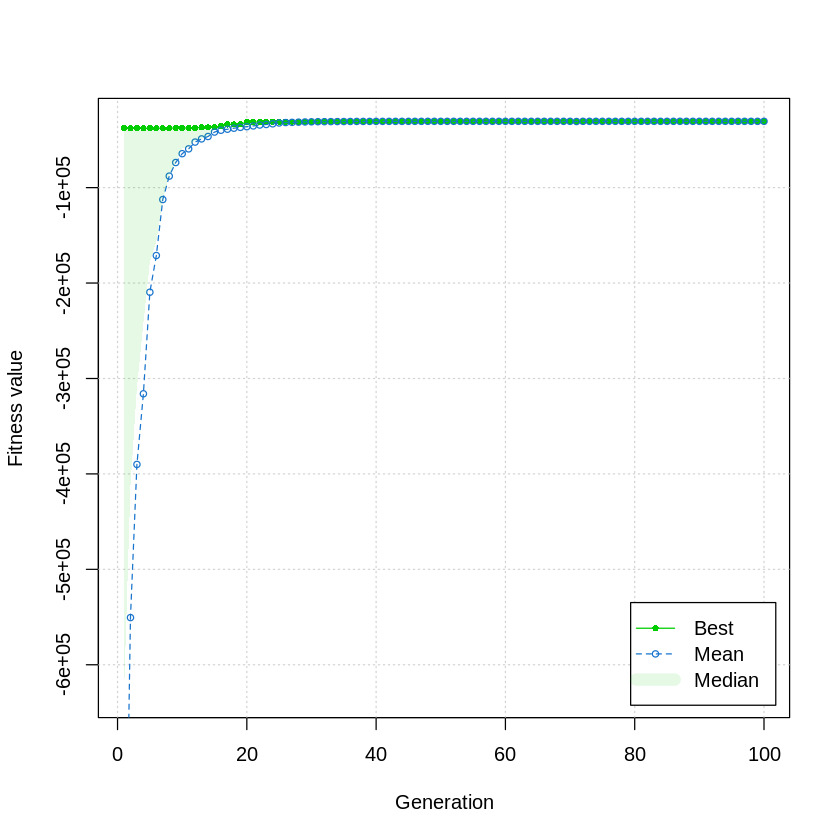

In [ ]:
# Static deflection (f2)

func2 <- function(x1, x2, x3, x4)
{
  60000/(x3*(x1 - 2*x4)^3) + 2*x2*x4*(4*x4^2 + 3*x1*(x1 - 2*x4))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness = function(x) -func2(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)



*   x1 = 14.48
*   x2 = 18.44
*   x3 = 3.71
*   x4 = 1.67

#### All values are closer to lower bound values of the geometric side constraints in comparison to the upper bound values.

#### x4 has the closest minimum value with 1.67 compared with a .90 lower bound minimum. x2 has the biggest difference with 18.44 compared with a 10.00 lower bound minimum.




##**Closing Remarks**

#### When Cross Section Area (f1) and Static Deflection (f2) side dimensions are compared, x4 is the smallest diference with a flange difference of 0.31. x1 has the biggest difference with a depth of 6.23. For Cross Section Area (f1), x2, x,3 and x4 are smaller in comparison to Static Defleciton (f2).


---

*   Cross Section Area (f1): x4 = 1.36
*  Static Deflection (f2): x3 = 1.67

#### When minimizing both funcitons x4 seems to minimally affect the overall dimensions as there is a small difference between them in comparison to the other x side dimensions.

---

*  Cross Section Area (f1): x1 = 20.71
*  Static Deflection (f2): x1 = 14.48

#### By minimizing the Cross Section Area Function (f1), the depth of the beam (x1) is larger in comparison to the Static Deflection (f2).

---
#### The Cross Section Area's (f1) priorty is weight of beam. Cross Section Area x values are smaller to make the beam lighter. However, the depth (x1) is increased to avoid the beam bending under pressure.  

#### The Static Deflection's (f2) priority is to avoid breakage of a beam that could be too thin. Static Deflection's x2, and x3, and x4 values are increased to avoid a thinner beam that would create a weaker deflection. The depth (x1) is decreased to improve the beam's deflection.

